###Libraries you'll likely need

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [85]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

### Initial Data Exploration

####1. Q1
The columns of my data are not the expected data types based on their descriptions. Continuous numerical variables are stored as integers (int64) which would only allow for whole numbers and not decimal places. They should be stored as floats instead.

In [86]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


####2. Q2
The author of this dataset used their own special character(" ?", as we can see from .value_counts()) to denote a missing value. Hence, it appears as though there are no null values when we initially call income94.info().

In [87]:
# Finding how missing values are represented
income94.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [88]:
# Looking at one specific entry from one specific row for what missing value is stored as
income94.iloc[27][1]

' ?'

In [89]:
# Repalacing missing values with nan
income94 = income94.replace(" ?", np.nan)
income94.info()

# Counting the number of missing values in each column
print("\nNumber of Missing Values in Each Column")
print(income94.isna().sum())

# Convert selected columns from ints to floats
for col in ['age', 'fnlwgt', 'education_num', 'capital_gain', 'hours_per_week']:
  income94[col] = income94[col].astype('float64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Number of Missing Values

####3. Q3
Individually plotting the distributions of capital_gain and capital_loss:

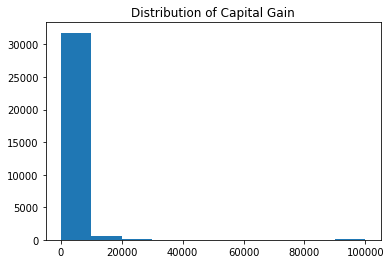

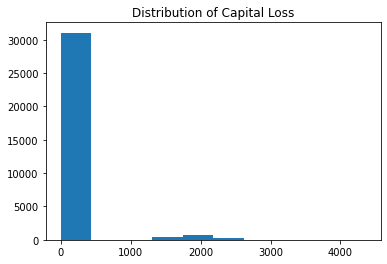

In [90]:
plt.hist(income94.capital_gain)
plt.title("Distribution of Capital Gain")
plt.show()

plt.hist(income94.capital_loss)
plt.title("Distribution of Capital Loss")
plt.show()

These variables should not be transformed because most obeservations have 0 in capital gain and most observations have 0 in capital loss. We should instead have a new categorical variable (called capital) detailing whether their was capital gain or capital loss or neither. We could have: "gain" for capital gain; "loss" for capital loss and "neither" for neither capital gain nor capital loss.

In [91]:
income94["end_capital"] = np.where(income94.capital_gain==0, "neither", "gain")
income94["end_capital"] = np.where(income94.capital_loss!=0, "loss", income94["end_capital"])

# Table for the distribtion of capital
income94.groupby("end_capital").size().reset_index(name="count")


,end_capital,count
0,gain,2712
1,loss,1519
2,neither,28330


####4. Q4
From the plot of the distribution of fnlwgt, we see that the variable is not symmetrically distributed- it is right skewed.

Comparing the disitribution of this variable between men and women, we see that both distributions are similiar in shape. Both distributions are right skewed and have modes at 0.2. 

A common method of classifying points as outliers is to look for points outside of the interquartile range. From the box plot, we can see that there are a lot of observations outside of the interquartile range (for both males and females). However, there aren't just one or two off points, this seems to be a very common occurence for a significant number of observations. Thus, all these points should not be excluded in our analysis.

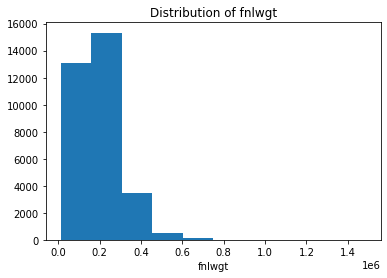

In [92]:
# Plotting the distirbution of weights
plt.hist(income94.fnlwgt)
plt.title("Distribution of fnlwgt")
plt.xlabel("fnlwgt")
plt.show()

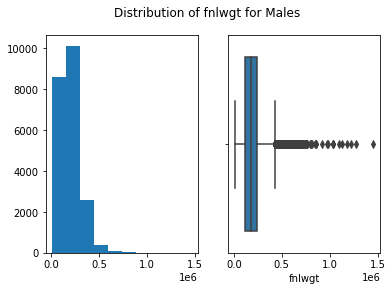

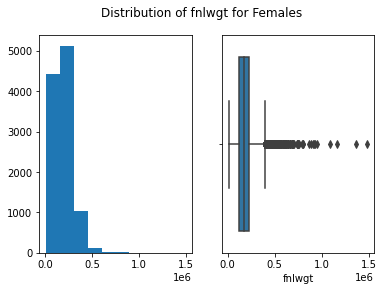

In [94]:
# Comparing the disitribution of this variable between men and women
fig, (plt1, plt2) = plt.subplots(1, 2)
fig.suptitle('Distribution of fnlwgt for Males')
plt1.hist(income94[income94.sex == ' Male'].fnlwgt)
sns.boxplot(x = 'fnlwgt', data = income94[income94.sex == ' Male'])
fig.show()

fig2, (plt3, plt4) = plt.subplots(1, 2)
fig2.suptitle('Distribution of fnlwgt for Females')
plt3.hist(income94[income94.sex == ' Female'].fnlwgt)
sns.boxplot(x = 'fnlwgt', data = income94[income94.sex == ' Female'])
fig2.show()

### Correlation

#### Q1a.
Correlation  between age, education_num and hours_per_week

In [103]:
income94[["age", "education_num", "hours_per_week"]].corr(method ='pearson') 

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


From the table, we see that hours_per_week and education_num have the highest correlation among the variable pairs- at 0.148123. Further, education_num and age have the lowest correlation at 0.036527.

#### Q1b.
The only variable pair with correlation over 0.1 is hours_per_week and education_num. I now test for the difference from 0.

In [104]:
stats.stats.pearsonr(income94.hours_per_week, income94.education_num)

(0.1481227326229122, 4.2366474790836004e-159)

We see that the correlation is 0.148123 and has a p-value of 4.2366e-159. Since the p-value is extremely small, there is strong evidence that the correlation coefficient is not 0 and that the correlation coefficient is significant. 

Prior to doing the test, I expected hours_per_week to increase as education_num increased. The test suggests that the correlation between these two variables is positive. Hence, the direction of the correlation is as I expected.

#### Q1c.

Comparing correlation between educaton_num and age for males and females.

In [105]:
# Males
male_corr = stats.stats.pearsonr(income94[income94.sex == ' Male'].education_num, income94[income94.sex == ' Male'].age)
print("Correlation between education_num and age for males:")
print(male_corr)

# Females
fem_corr = stats.stats.pearsonr(income94[income94.sex == ' Female'].education_num, income94[income94.sex == ' Female'].age)
print("\nCorrelation between education_num and age for females:")
print(fem_corr)

Correlation between education_num and age for males:
(0.060486409198268254, 4.0229868301718123e-19)

Correlation between education_num and age for females:
(-0.017899243935447704, 0.06322895030804963)


For males, we see that the correlation is roughly 0.0605 and has a p-value of 4.023e-19. Since the p-value is very small, there is strong evidence that the correlation coefficient is not 0 and that the correlation coefficient is significant. 

For female, we see that the correlation is roughly -0.018 and has a p-value of 0.0632. Since the p-value is not very small, there is weak evidence that the correlation coefficient is not 0- that is, we do not reject the null hypothesis that the correlation coefficient is 0. 

These results are not as I expected. When I discovered the correlation between education_num and age for both males and females (in part 1a), I found that the correlation was roughly 0.0365. I originally expected both males and females to have positive correlations. That is, I expected an association between older males and females with increased education: the older a person is, the more time they have to complete their education. I did not expect the female correlation to be negative with a relatively large p-value.


#### Q1d.
Comparing the weighted vs. unweighted variance and covariance between education_num and hours_per_week.

Note that the first column represents education_num and the second column represents hourse_per_week.


In [107]:
print("Unweighted Variance and Covariance Between education_num And hours_per_week")
print(np.cov(income94.education_num, income94.hours_per_week))
print("\nWeighted Variance and Covariance Between education_num And hours_per_week")
print(np.cov(income94.education_num, income94.hours_per_week, aweights=income94.fnlwgt))


Unweighted Variance and Covariance Between education_num And hours_per_week
[[  6.61888991   4.70533794]
 [  4.70533794 152.45899505]]

Weighted Variance and Covariance Between education_num And hours_per_week
[[  6.82892114   4.63407476]
 [  4.63407476 146.33651739]]


We can see that the unweighted variance of education_num (roughly 6.619) is lower than the weighted variance (roughly 6.829). This implies that values at the extreme are underrepresented- that is, people with a very low education number or with a very high education number are underrepresented. 

Additionally, the unweighted variance of hours_per_week (roughly 152.459) is higher than the weighted variance (roughly 146.337). This implies that values at the extreme are overrepresented- that is, people working very little hours per week or a lot of hours per week are overrepresented. 
These weights tell us what group is overrepresented or underrepresented.

### Regression

#### Q1a. Fitting a linear regrssion with hours_per_week as the dependent variable and sex as the independent variable.

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:05:44   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   

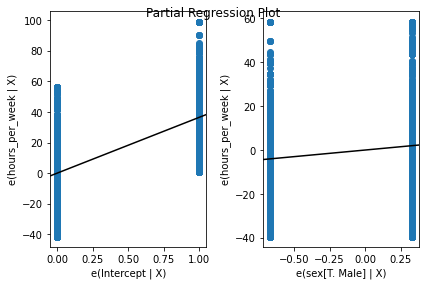

In [108]:
reg1 = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg1.summary())

fig = sm.graphics.plot_partregress_grid(reg1)
fig.tight_layout(pad=1.0)

From the fitted linear regression, the estimated slope parameter is positive which implies that men tend to work more hours than women.

#### Q1b. Include the variable education_num



In [109]:
reg2 = smf.ols('hours_per_week ~ sex+education_num', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:05:47   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

We see that the slope parameter for sex is at 5.9709 after the addition of the extra variable. Prior to this, the slope parameter was 6.0177. Hence, the addition of the extra variable did not affect the trend in hours worked by men vs women much. That is, the fitted linear regression still suggests that men tend to work more hours than women.

Further, the variable education_num is significant to predicting hours_per_week since its associated p-value is extremely close to 0. Moreover, the adjusted R^2 of this model is 0.074, which is higher than the adjusted R^2 of the model without education_num as a predictor (0.053). Hence, the percentage of variation in hours per week can be explained by this model (with 2 predictors) better than the model with only 1 predictor (sex).

#### Q1c. Add gross_income_group


In [110]:
# Make new column that takes value 1 if there is capital gain and 0 otherwise
income94["gross_income_group"] = (income94.capital_gain > 0).astype(int)

reg3 = smf.ols('hours_per_week ~ sex+education_num+gross_income_group', data = income94).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     887.9
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:05:49   Log-Likelihood:            -1.2676e+05
No. Observations:               32561   AIC:                         2.535e+05
Df Residuals:                   32557   BIC:                         2.536e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             29.5407      0

The p-value associated with gross_income_group is very small which implies that the variable gross_income_group is relevant to estimating hours_per_week. Similarly, the p-values associated with the other 2 variables are also very close to 0 and hence, the other two variables are also significant in estimating hours_per_week. 

To decide which model is the best, I would work with AIC since this information criterion penalizes complex models.

In this question, I started with a model with only 1 independent variable and adding in an extra variable in every step. For my model fitting procedure, I would use forward selection and also start with the simplest model before adding in independent variables. I would add in the variable that results in the lowest AIC among all the other models with the same amount of predictors. I would continue to do this until the AIC no longer reduces.